O trabalho a seguir, visa realizar uma análise dos dados de venda de produtos de uma empresa da área de alimentos.
O objetivo final da análise é fornecer orientações que permitam à empresa melhorar sua produção, distribuição e aumentar seu faturamento.
Foram analisadas todas as Notas Fiscais eletrônicas emitidas entre setembro de 2014 e fevereiro de 2018


In [1]:
import pandas as pd
import numpy as np
import locale
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import seaborn as sns
%matplotlib inline
sns.set()
rcParams['figure.figsize'] = 15,6
# Define Moeda Brasileira numeros R$ 1.000,00
locale.setlocale( locale.LC_ALL, '' )
#locale.currency( g, grouping = True )

'Portuguese_Brazil.1252'

In [2]:
from numpy.random import randn
np.random.seed(101)

In [3]:
#pd.options.display.float_format = 'R${:,.2f}'.format

In [4]:
df = pd.read_csv('NFe-SupraAlimentos.csv', dtype={'cod': object, 'NF': object, 'CNPJ': object})


In [5]:
df.tail()

,cliente,NF,data,CNPJ,cidade,bairro,UF,cod,descricao,QTY,unidade,preco
163700,COMERCIO DE CEREAIS IZANITA LIMITADA.,8031,2018-02-09,07258484000112,SAQUAREMA,BACAXA,RJ,010110,AMACIANTE DE CARNE C/ ERVAS FINAS 60GR FD 36 UNID,1,FD,70.31
163701,COMERCIO DE CEREAIS IZANITA LIMITADA.,8031,2018-02-09,07258484000112,SAQUAREMA,BACAXA,RJ,050147,CALDO DE GALINHA FOODS 1 010KG,6,UN,32.94
163702,COMERCIO DE CEREAIS IZANITA LIMITADA.,8031,2018-02-09,07258484000112,SAQUAREMA,BACAXA,RJ,050148,CALDO DE CARNE FOODS 1 010KG,6,UN,32.94
163703,COMERCIO DE CEREAIS IZANITA LIMITADA.,8031,2018-02-09,07258484000112,SAQUAREMA,BACAXA,RJ,010093,COLORIFICO EXTRA 200GR FD 100 UNID,1,FD,278.26
163704,COMERCIO DE CEREAIS IZANITA LIMITADA.,8031,2018-02-09,07258484000112,SAQUAREMA,BACAXA,RJ,050149,CALDO DE BACON FOODS 1 010KG,6,UN,32.94


In [47]:
#df['data'] = pd.to_datetime(df['data'], format='%Y-%m-%d'  )    #'%Y%m%d'

In [48]:
#df.dtypes

# Vendas por p/ Mês 

In [6]:
vendasTotais = df[['data','preco']].groupby(df['data'].str[0:7]).sum().reset_index()

In [12]:
vendasTotais.head(10)

,data,preco
0,2014-08,25.15
1,2014-09,30659.84
2,2014-10,166108.11
3,2014-11,202230.11
4,2014-12,261422.34
5,2015-01,167359.14
6,2015-02,187427.98
7,2015-03,232049.37
8,2015-04,122549.58
9,2015-05,158585.94


In [15]:
vendasTotais.to_csv('C:/Mettricx/Projetos/SupraAlimentos/PowerBI/vendasMensais.csv',decimal=',',float_format='%.2f',encoding='utf-8', index=False)#vendasTotais['data'].str[0:4]

In [52]:
vendasTotais = vendasTotais[vendasTotais['data'].str[0:4] != '2014']

In [53]:
vendasTotais.tail()

,data,preco
38,2017-10,340063.38
39,2017-11,553964.42
40,2017-12,686666.72
41,2018-01,440912.50
42,2018-02,243182.04


In [ ]:
#vendasTotais['mes']=(vendasTotais['data'].str[5:7])

In [ ]:
#vendasTotais['mes'] = vendasTotais['mes'].apply(pd.to_numeric)

In [16]:
vendasTotais = vendasTotais.rename(index=str, columns={"data": "Mês", "preco": "Valor"})

In [ ]:
pd.__version__

In [17]:
vendasTotais.head(19)

,Mês,Valor
0,2014-08,25.15
1,2014-09,30659.84
2,2014-10,166108.11
3,2014-11,202230.11
4,2014-12,261422.34
5,2015-01,167359.14
6,2015-02,187427.98
7,2015-03,232049.37
8,2015-04,122549.58
9,2015-05,158585.94


In [56]:
vendasTotais['Valor'] = vendasTotais['Valor']/1000

In [18]:
# Transformando a coluna Mês em Tipo Date para processar na Time Series
vendasTotais['Mês'] = pd.to_datetime(vendasTotais['Mês'], format='%Y-%m'  )

In [19]:
vendasTotais.dtypes

Mês      datetime64[ns]
Valor           float64
dtype: object

In [20]:
vendasTotais.to_csv('C:/Mettricx/Projetos/SupraAlimentos/PowerBI/vendasMensais.csv',decimal=',',float_format='%.2f',encoding='utf-8', index=False)

In [59]:
vendasTotais.set_index('Mês', inplace=True)

In [60]:
Y= vendasTotais

In [61]:
Y.tail()

,Valor
Mês,
2017-10-01,340.06338
2017-11-01,553.96442
2017-12-01,686.66672
2018-01-01,440.91250
2018-02-01,243.18204


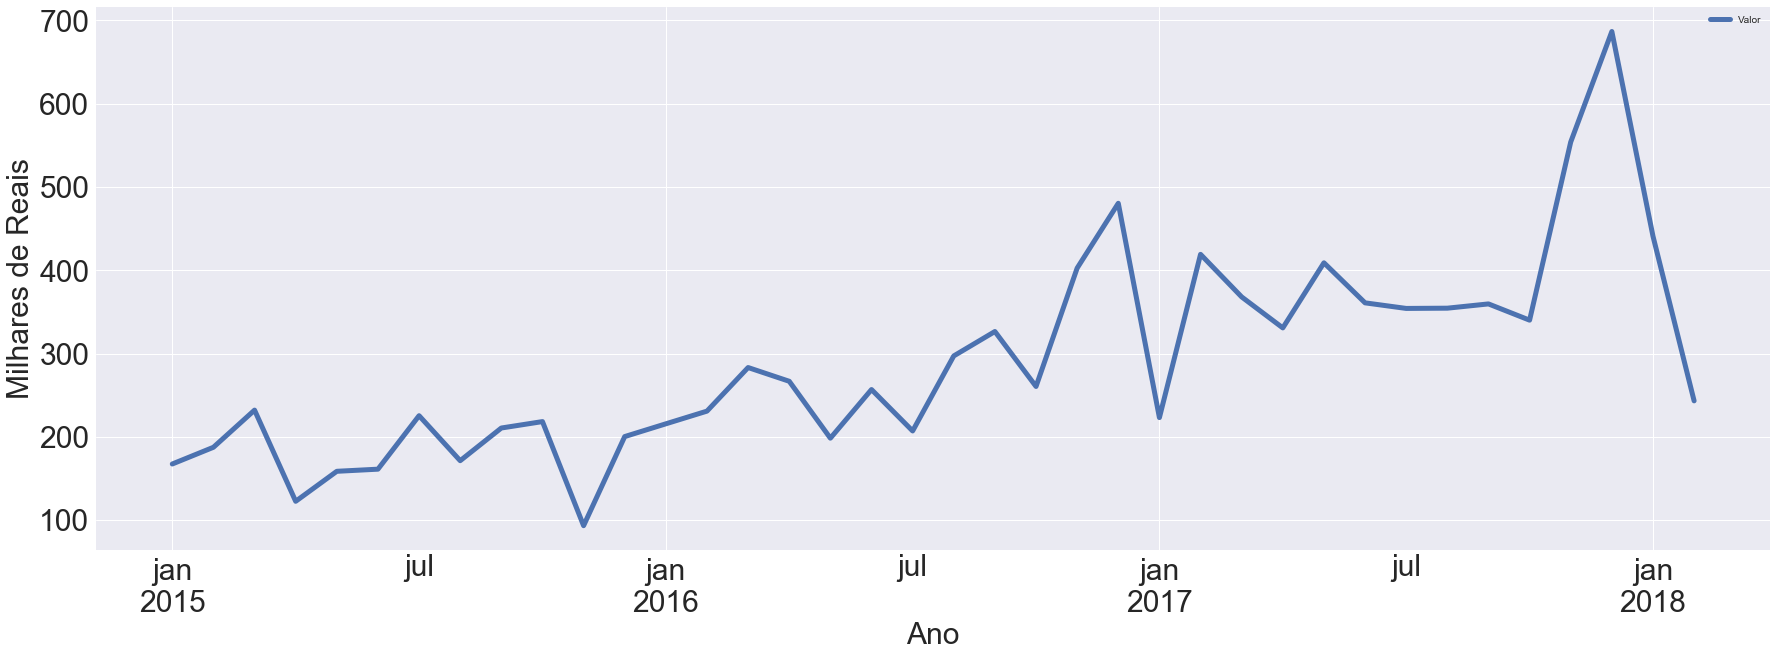

In [62]:
vendasTotais.plot(figsize=(30,10), linewidth=5, fontsize=30)
plt.xlabel('Ano', fontsize=30)
plt.ylabel('Milhares de Reais', fontsize=30)

#### ESTACIONARIEDADE

Este é um conceito muito importante na Análise de Séries Temporais. Para aplicar um modelo de Série Temporal, é importante que a série temporal seja estacionária; Em outras palavras, todas as suas propriedades estatísticas (média, variância) permanecem constantes ao longo do tempo. 
Isso é feito basicamente porque, se você tomar um determinado comportamento ao longo do tempo, é importante que esse comportamento seja o mesmo no futuro, para que possamos prever a série.

• constant mean

• constant variance

• an auto co-variance that does not depend on time.

Rolling Statistics:
A função irá representar graficamente a média móvel ou o desvio padrão em movimento. Um método visual
A qualquer instante, tomamos a média / std do último ano, o tamanho da Window.

In [63]:
a = vendasTotais.rolling(window = 4).mean()
b = vendasTotais.rolling(window = 4).std()

#### Valores médios

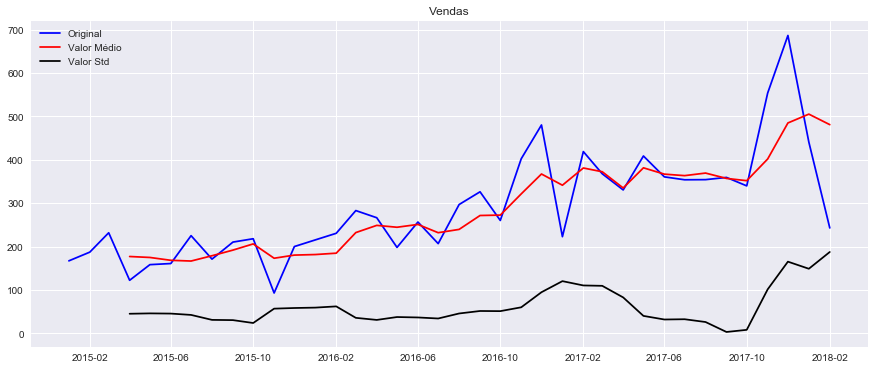

In [64]:
orig = plt.plot(vendasTotais, color='blue', label='Original')
mean = plt.plot(a, color='red', label='Valor Médio')
std  = plt.plot(b, color='black', label='Valor Std')
plt.legend(loc='best')
plt.title('Vendas')
plt.show(block=False)

#### Perform Dickey-Fuller test
Teste estatístico para verificar a estacionariedade da Série. Primeiro, consideramos a hipótese nula: a série temporal é Não-Estacionária. O resultado conterá o Test Statistic. A idéia é que esse valor seja menor que os Critical Values, neste caso podemos rejeitar a hipótese nula e dizer que esta série temporal é de fato Estacionária 

In [65]:
from statsmodels.tsa.stattools import adfuller

In [66]:
dftest = adfuller(vendasTotais['Valor'], autolag='AIC')

In [67]:
dfoutput = pd.Series(dftest[0:4], index=['Teste Statistic', 'p-value', '#Lags Used', 'Number of Obs Used'])

In [68]:
for key, value in dftest[4].items():
    dfoutput['Critical value (%s)'%key] = value
print(dfoutput)

Teste Statistic         -2.815453
p-value                  0.056100
#Lags Used               0.000000
Number of Obs Used      37.000000
Critical value (1%)     -3.620918
Critical value (5%)     -2.943539
Critical value (10%)    -2.610400
dtype: float64


###### A Série NÃO é estacionária pq:
   - O Valor médio está aumentando
   - Test stat é MAIOR que os Critical Values
    

#### Tornando a TS Estacionária

O log é utilizado para acertar a curva

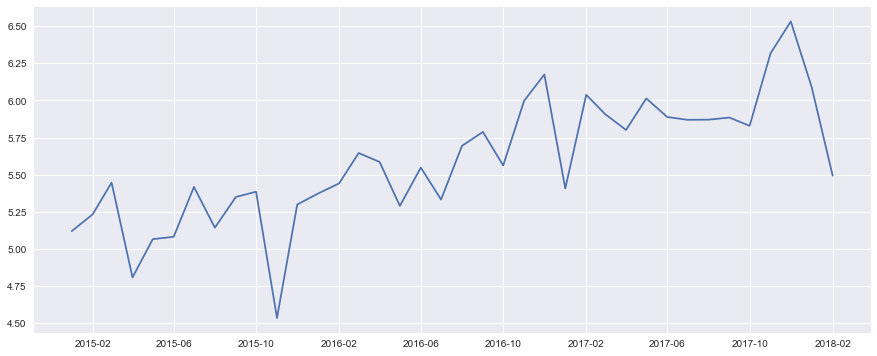

In [69]:
# Estimating trend
vendasTotais_Log = np.log(vendasTotais)
plt.plot(vendasTotais_Log )

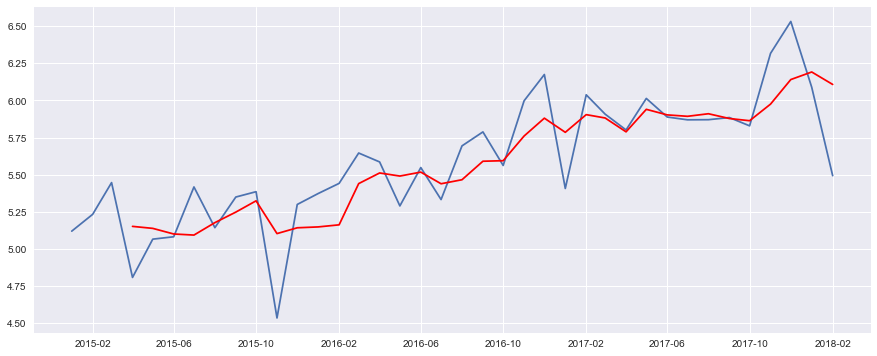

In [70]:
movingAverage = vendasTotais_Log.rolling(window=4).mean()
plt.plot(vendasTotais_Log)
plt.plot(movingAverage, color = 'red')

In [71]:
dsMinusAverage_Log = vendasTotais_Log - movingAverage

In [72]:
dsMinusAverage_Log.head(12)

,Valor
Mês,
2015-01-01,NaN
2015-02-01,NaN
2015-03-01,NaN
2015-04-01,-0.343735
2015-05-01,-0.072493
2015-06-01,-0.018746
2015-07-01,0.323998
2015-08-01,-0.033843
2015-09-01,0.101450


In [73]:
dsMinusAverage_Log.dropna(inplace=True)

In [74]:
#dsMinusAverage_Log.head(10)

In [85]:
def test_stationarity(timeseries):
    # Rolling statistics
    movingAverage = timeseries.rolling(window=6).mean()
    movingStd     = timeseries.rolling(window=6).std()
    
    #Plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Valor Médio')
    std  = plt.plot(movingStd, color='black', label='Valor Std')
    
    plt.legend(loc='best')
    plt.title('Vendas')
    plt.show(block=False)
    
    # Perform Dickey-Fuller test
    dftest = adfuller(timeseries['Valor'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Teste Statistic', 'p-value', '#Lags Used', 'Number of Obs Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical value (%s)'%key] = value
    print(dfoutput)


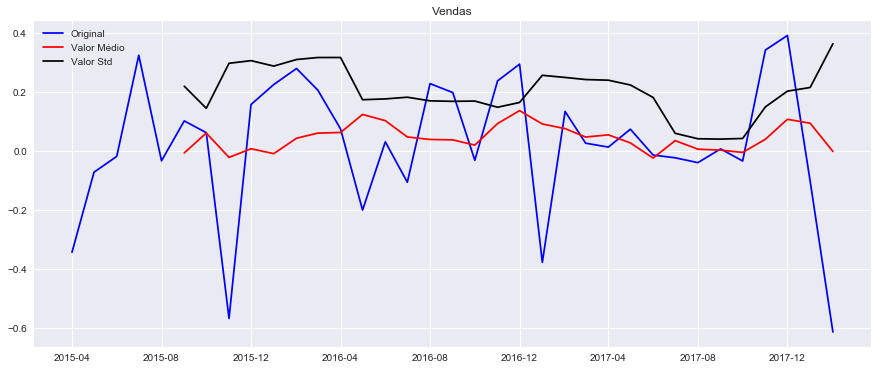

Teste Statistic         -4.665705
p-value                  0.000098
#Lags Used               4.000000
Number of Obs Used      30.000000
Critical value (1%)     -3.669920
Critical value (5%)     -2.964071
Critical value (10%)    -2.621171
dtype: float64


In [86]:
test_stationarity(dsMinusAverage_Log)

#### Test Statics (-3,5) < Critical Value 5% (-2,98). Isso nos diz que estamos 95% confiantes de que esta série é estacionária.

C:\Users\leona\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(halflife=6,min_periods=0,adjust=True,ignore_na=False).mean()
  """Entry point for launching an IPython kernel.


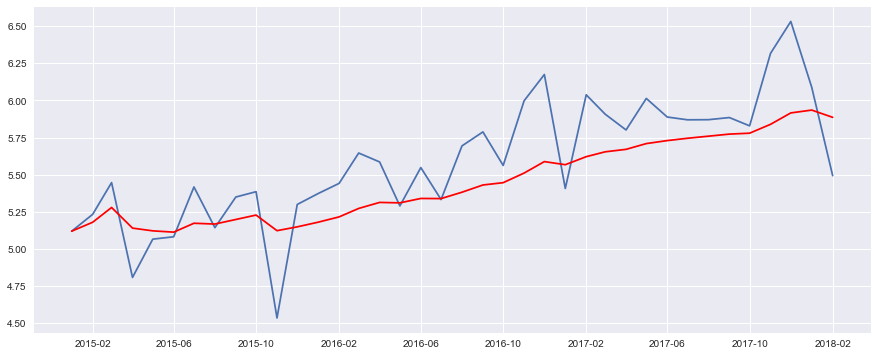

In [87]:
expAverage = pd.ewma(vendasTotais_Log, halflife=6) #, min_periods=0, adjust=True).mean()
#expAverage = vendasTotais_Log.ewma(halflife=6, min_periods=0, adjust=True).mean()
plt.plot(vendasTotais_Log)
plt.plot(expAverage, color = 'red')

In [88]:
expAverage_diff = vendasTotais_Log - expAverage

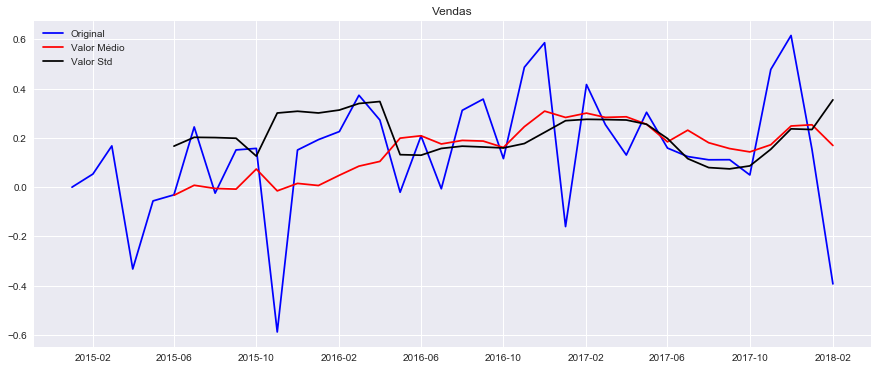

Teste Statistic         -4.011895
p-value                  0.001349
#Lags Used               1.000000
Number of Obs Used      36.000000
Critical value (1%)     -3.626652
Critical value (5%)     -2.945951
Critical value (10%)    -2.611671
dtype: float64


In [89]:
test_stationarity(expAverage_diff)

In [90]:
ts_log_diff = vendasTotais_Log - vendasTotais_Log.shift()

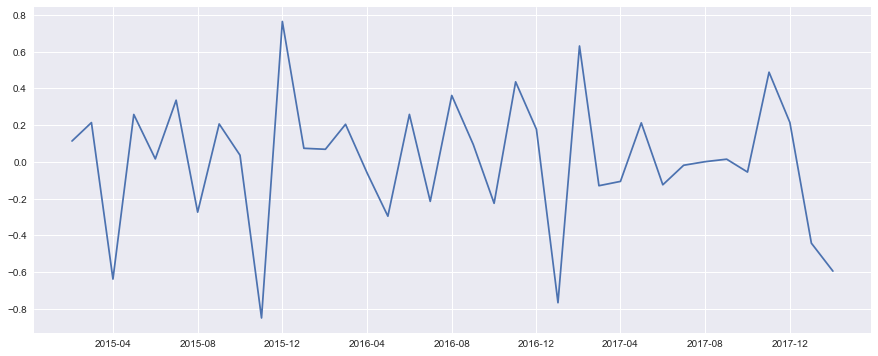

In [91]:
plt.plot(ts_log_diff)

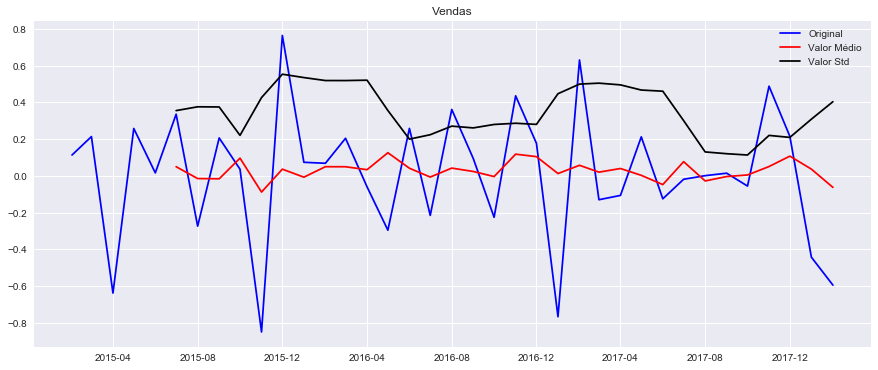

Teste Statistic         -5.105813
p-value                  0.000014
#Lags Used               4.000000
Number of Obs Used      32.000000
Critical value (1%)     -3.653520
Critical value (5%)     -2.957219
Critical value (10%)    -2.617588
dtype: float64


In [94]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

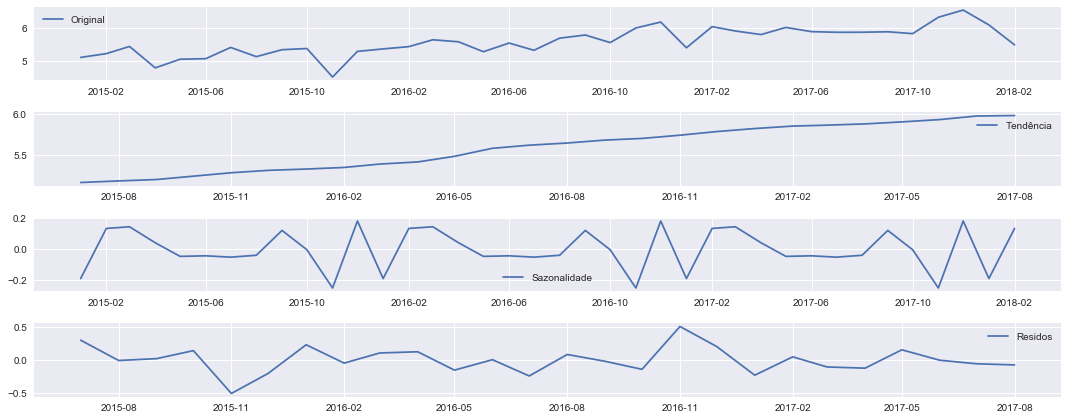

In [96]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(vendasTotais_Log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(vendasTotais_Log, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Tendência')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Sazonalidade')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residos')
plt.legend(loc='best')

plt.tight_layout()


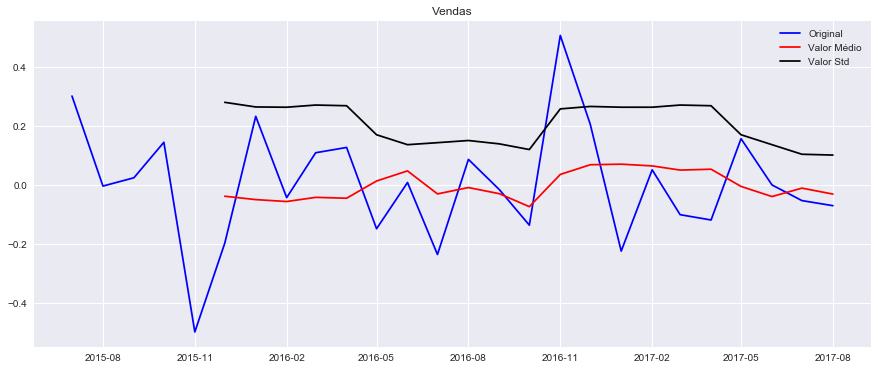

Teste Statistic         -4.668411
p-value                  0.000096
#Lags Used               3.000000
Number of Obs Used      22.000000
Critical value (1%)     -3.769733
Critical value (5%)     -3.005426
Critical value (10%)    -2.642501
dtype: float64


In [97]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

Test Statistic < Critical Value(1%)

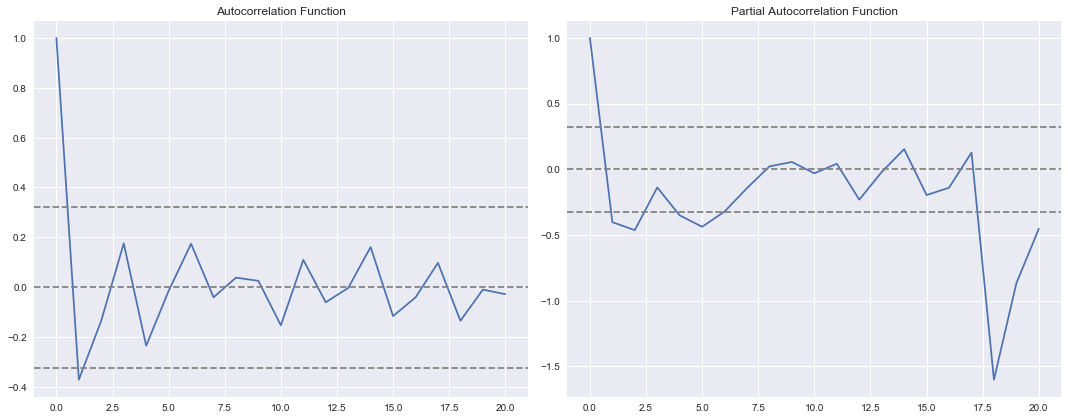

In [98]:
from statsmodels.tsa.arima_model import ARIMA

from statsmodels.tsa.stattools import acf, pacf

lag_acf  = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

#Plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray' )
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)), linestyle='--', color='gray' )
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)), linestyle='--', color='gray' )
plt.title('Autocorrelation Function')

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray' )
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)), linestyle='--', color='gray' )
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)), linestyle='--', color='gray' )
plt.title('Partial Autocorrelation Function')
plt.tight_layout()


#### MA Model

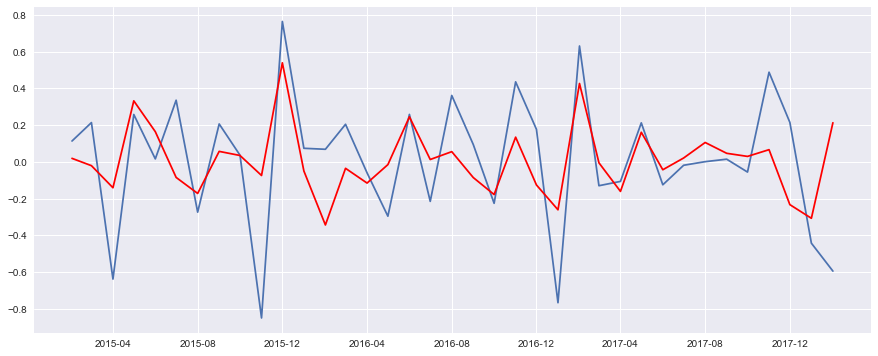

In [100]:
model = ARIMA(vendasTotais_Log, order=(2,1,0))
results_AR = model.fit(disp=-1)
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
#plt.title('RSS: %.4f'% sum((results_AR.fittedvalues - ts_log_diff)**2))

In [ ]:
mediaPorMes = []

In [ ]:
jan=0
fev=0
mar=0
abr=0
mai=0
jun=0
jul=0
ago=0
xet=0
out=0
nov=0
dez=0
tjan=0
tfev=0
tmar=0
tabr=0
tmai=0
tjun=0
tjul=0
tago=0
txet=0
tout=0
tnov=0
tdez=0

In [ ]:

for i in range(0, len(dados)):
    #if (dados.iloc[i]['data'], dados.iloc[i]['preco'], dados.iloc[i]['mes'])
    if dados.iloc[i]['mes']==1:
        jan = jan + dados.iloc[i]['preco']
        tjan += 1
    elif dados.iloc[i]['mes']==2:
        fev = fev + dados.iloc[i]['preco']
        tfev += 1
    elif dados.iloc[i]['mes']==3:
        mar = mar + dados.iloc[i]['preco'] 
        tmar += 1
    elif dados.iloc[i]['mes']==4:
        abr = abr + dados.iloc[i]['preco'] 
        tabr += 1
    elif dados.iloc[i]['mes']==5:
        mai = mai + dados.iloc[i]['preco'] 
        tmai += 1
    elif dados.iloc[i]['mes']==6:
        jun = jun + dados.iloc[i]['preco'] 
        tjun += 1
    elif dados.iloc[i]['mes']==7:
        jul = jul + dados.iloc[i]['preco'] 
        tjul += 1
    elif dados.iloc[i]['mes']==8:
        ago = ago + dados.iloc[i]['preco']
        tago += 1
    elif dados.iloc[i]['mes']==9:
        xet = xet + dados.iloc[i]['preco'] 
        txet += 1
    elif dados.iloc[i]['mes']==10:
        out = out + dados.iloc[i]['preco'] 
        tout += 1
    elif dados.iloc[i]['mes']==11:
        nov = nov + dados.iloc[i]['preco']
        tnov  += 1
    elif dados.iloc[i]['mes']==12:
        dez = dez + dados.iloc[i]['preco']
        tdez += 1
        
mediaPorMes = [jan/tjan,fev/tfev,mar/tmar,abr/tabr,mai/tmai,jun/tjun,jul/tjul,ago/tago,xet/txet,out/tout,nov/tnov,dez/tdez]     
print(jan) 

In [ ]:
media = pd.DataFrame(mediaPorMes,columns=['media'])

In [ ]:
media['media']=media['media']/1000

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()

In [ ]:
X = [[1], [2], [3],[4], [5], [6], [7], [8], [9], [10], [11], [12]]

In [ ]:
X

In [ ]:
Y=media.values

In [ ]:
Y

In [ ]:
y=Y.index

In [ ]:
plt.figure()

In [ ]:
plt.title('Faturamento médio por Mês')
plt.xlabel(' Mês')
plt.ylabel('Mil reais')
plt.scatter(X, Y,  color='black')
plt.plot(X, Y, 'k.', color='blue', linewidth=3)
plt.axis([ 0, 13,100, 500])
plt.grid(True)
plt.show()

In [ ]:
model.fit(X, Y)

In [ ]:
print(model.coef_)

In [ ]:
# Make predictions using the testing set
y = model.predict(X)

In [ ]:
# The mean square error
np.mean((model.predict(X)-Y**2))

In [ ]:
model.score(X, Y) 

In [ ]:
print('Variance score: %.2f' % r2_score(y, Y))

In [ ]:
plt.xticks(())
plt.yticks(())
plt.show()

In [ ]:
model.predict

In [ ]:
media

In [ ]:
jan=0
def xMedia(x):
    if x.mes == '1':
       jan = jan + x['preco']
    return jan   

In [ ]:
mediaPorMes = xMedia(dados)

In [ ]:

dados2018 = dados[(dados['data'].str[0:4]=='2018')]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N = 50
x = dados['preco']/1000
y = dados['mes']
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(x, y, s=area,  alpha=0.5)
plt.show()

In [ ]:
dados2018.reset_index()

In [ ]:
dados2018.head()

In [ ]:
dados2017 = dados[(dados['data'].str[0:4]=='2017')]

In [ ]:
d17=dados2017.reset_index()

In [ ]:
d17.head()

In [ ]:
dados2016 = dados[(dados['data'].str[0:4]=='2016')]

In [ ]:
d16=dados2016.reset_index()

In [ ]:
d16.head()

In [ ]:
dados2015 = dados[(dados['data'].str[0:4]=='2015')]

In [ ]:
dados2015.head()

In [ ]:
dados2014 = dados[(dados['data'].str[0:4]=='2014')]

In [ ]:
dados2014.head()

In [ ]:
d18=dados2018.reset_index()

In [ ]:
d18.head()

In [ ]:
dados2018.loc[9]=('2018-12',0)

In [ ]:
d14=dados2014.sort_values(by=['data']).reset_index()

In [ ]:
sales = [('Mês',['Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez']),
         ('2014',d14['preco']),
         ('2015',d15['preco']),
         ('2016',d16['preco']),
         ('2017',d17['preco']),
         ('2018',d18['preco']),]
#ds = pd.DataFrame.from_items(sales)

In [ ]:
ds = pd.DataFrame.from_items(sales)

In [ ]:
ds

In [ ]:
d17=dados2017.sort_values(by=['data']).reset_index()

In [ ]:
d18.head()

In [ ]:
d17.drop(['index'], axis = 1, inplace = True, errors = 'ignore')

In [ ]:
d17.head()

In [ ]:
d18

In [ ]:
d18.drop(['index'], axis = 1, inplace = True, errors = 'ignore')

In [ ]:
d18.head()

In [ ]:
d14

In [ ]:
m14=dados2014.mean()

In [ ]:
m15=dados2015.mean()
m15



In [ ]:
m16=dados2016.mean()
m16

In [ ]:

m17=dados2017.mean()
m17

In [ ]:
m18=dados2018.mean()
m18

In [ ]:
mAno=[m14,m15,m16,m17,m18]
mAno

In [ ]:
int(a)

In [ ]:
#graficoMedios = dados2015[['preco']].plot.bar()
graficoMedios = dados2015.plot( x=dados2015['data'].str[5:7],stacked=True, kind='bar', figsize=(15,7), rot=0, legend=False)

graficoMedios.set_xlabel('Mês')
graficoMedios.set_ylabel('Tot Compras')
graficoMedios.set_title('Volume de Compras em 2015')
graficoMedios.axhline(y=int(a), color='r', linestyle='--', lw=2, label='Valor Médio')
#15.a.axhline(y=a, label='Pinny Mean', linestyle='--', color='red')



In [ ]:
dados2015.plot.line()

In [ ]:
dadosSet2014[['cliente','NF','cod','preco']].sum()

In [ ]:
df.groupby(df['data'].str[1:10]).size()
#df['data']

In [ ]:
dados.head()

In [ ]:
#dados.loc[0:5,['Campo1','Campo2']]

In [ ]:
# dados.loc[:,'col1':'col2'].applymap(float)

In [ ]:
dados['status'] = dados['preco'].map(lambda x: Media(x))

In [ ]:
pequenos = dados[dados['status']==0.2]

In [ ]:
len(bons)

In [ ]:
medios.head()
m=medios.sort_values(by='preco', ascending=False)

In [ ]:
len(pequenos)

In [ ]:
plt.rcParams['figure.figsize']=(15,6)

In [ ]:
 plt.figure(); medios.plot(style='k--', label='Series');

In [ ]:
a=[]
c = range(126)

In [ ]:
type(c)

In [ ]:
ind

In [ ]:
len(m)

In [ ]:
dados.preco

In [ ]:
dados['media']= dados['preco'] #dados['media'].apply(Media(dados['preco']))

In [ ]:
dados['media'].apply(Media(dados['preco']))

In [ ]:
dados.head()

In [ ]:
y = dados['preco'] <= dados['preco'].mean()

In [ ]:
type(y)

In [ ]:
def media(x):
    

In [ ]:
type(dados)

In [ ]:
#cliCompras = df['preco'].groupby(df['CNPJ']).sum()
cliCompras10 = df['preco'].groupby(df['CNPJ'])
#df.groupby(['CNPJ', 'preco']).preco.sum()

#grouped_multiple_column = df.groupby(['CNPJ','preco'])['preco']
#lista = df[['CNPJ','preco']]

In [ ]:
#cliCompras10.index.names

In [ ]:
type(cliCompras10).sum()

In [ ]:
cliCompras10.groups

In [ ]:
#cliCompras10).sum()
for name, group in cliCompras10:
    print(name)
    print(group.shape)

In [ ]:
cliCompras10.loc[0]['175479000105']
#df.loc[0]['A'])

In [ ]:
#grouped_multiple_column


In [ ]:
p = lista['preco'].groupby(df['CNPJ']).sum()

In [ ]:
p

In [ ]:
clienteCompras = cliCompras.to_frame()

In [ ]:
type(clienteCompras )

In [ ]:
clienteCompras.tail()

In [ ]:
clientesCompras['preco']=

In [ ]:
clienteCompras.columns.values


In [ ]:
totVendas = clienteCompras.sum()

In [ ]:
(totVendas)
#f=locale.currency( g, grouping = True )

In [ ]:
clienteCompras['preco']

In [ ]:
g = float("{0:.2f}".format(tot)) f=locale.currency( g, grouping = True )
clienteCompras.sort_values(by='preco', ascending=False)

In [ ]:
for key in grouped:
    print(key)

In [ ]:
#df['cod']
#df.loc(163689)
prod = df[['cod', 'produto']]

In [ ]:
prod

In [ ]:
type(prod)

In [ ]:
produto= prod.drop_duplicates()

In [ ]:
(produto)

In [ ]:
produto.to_csv('produtos.csv')

In [ ]:
a=s.values

In [ ]:
len(a)

In [ ]:
#df.loc[:, ['cod', 'produto']]
df[df.cod=='01.0002']

In [ ]:
A = df['A'].copy()
A.sort_values(inplace=True)

In [ ]:
produtos.sort()

In [ ]:
j=0
for i in produtos:
    print(produtos[j])
    j += 1

In [ ]:
df.head()

## Selection and Indexing

Let's learn the various methods to grab data from a DataFrame

In [ ]:
df[['preco']] = df[['preco']].apply(pd.to_numeric)

In [ ]:
df = df.drop(df_UN, axis=1)

In [ ]:
tot = df['preco'].sum()

In [ ]:
g = float("{0:.2f}".format(tot)) f=locale.currency( g, grouping = True )

In [ ]:
g

In [ ]:

f=locale.currency( g, grouping = True )

In [ ]:
f

In [ ]:
tot.

In [ ]:
msk = df.dtypes == np.float64 #df.loc[:, msk]
msk

In [ ]:
# Numero de Clientes
a=df.groupby(['CNPJ','NF','preco'])

In [ ]:
#dados = olx.groupby(olx['timestamp'].str[8:10]).size()
#df.groupby(['NF']).sum()
#df.groupby(['CNPJ', 'NF'])['preco'].agg('sum')
#a=df.groupby(['CNPJ',df['data']])['NF'].unique() #.count() #agg('sum') .str[0:7]
cnpjCompras = df.groupby(['CNPJ'])['preco'].agg('sum')

In [ ]:
type(cnpjCompras)

In [ ]:
cnpjCompras.count()

In [ ]:
f=locale.currency( cnpjCompras.min(), grouping = True )

In [ ]:
f

In [ ]:
df.groupby(['CNPJ','NF']).size()

In [ ]:
type(a)

In [ ]:
a


In [ ]:
df

In [ ]:
# Pass a list of column names
#Select * from df
lista = df[['data','CNPJ','cidade']]

In [ ]:
(lista)

In [ ]:
# Select Descrição da linha 100
# loc pega pela Chave
df['descricao'].loc[100]

In [ ]:
# Select * where linha = 100
#linha = df.iloc[1:10] # Pega da index 1 a 9
#linha = df.iloc[10]   # Pega a linha 10
linha = df.iloc[:10] 

df.iloc[4514]

In [ ]:
df[df['produto']=='106']

In [ ]:
(linha)

In [ ]:
df[df['W']>0]['Y']     #df[(df['W']>0) & (df['Y'] > 1)]

In [ ]:
linha.Bairro
#linha.CNPJ
#linha.Preco

In [ ]:
# Select * from df where Descricao = kkkkk
#df[df['Descricao']=='CALDO DE CARNE COM ERVAS FINAS 60GR']
df[df['Preco'] == 'UN']

In [ ]:
mask = (df['Preco'] == 'UN')
#& (df['date'] <= '2000-6-10')
#print np.shape((calit2_dataFrame.loc[mask]))
supra_df = df.loc[mask]

In [ ]:
supra_df

In [ ]:
(df['data'].str[0:7])

In [ ]:
df[(df['Cod']=='01.0009') & (df['Data'].str[0:4] == '2014')]

In [ ]:
#Select Cidade from df where descrição = kkkkk
cidades = df[df['Descricao']=='CALDO DE CARNE COM ERVAS FINAS 60GR'][['Cidade','Bairro','CNPJ']]

In [ ]:
cidades.sort_values(by='CNPJ',ascending=0)

In [ ]:
df.set_index(['Cidade'])

In [ ]:
df.columns = df.columns.to_series().apply(lambda x: x.strip())

In [ ]:
df[['Preco','Qty']] = df[['Preco','Qty']].apply(pd.to_numeric)

In [ ]:
df.pivot_table(values='Preco',index=['Data', 'NF']) #,columns=['C']

In [ ]:
# SQL Syntax (NOT RECOMMENDED!)
df.W

DataFrame Columns are just Series

In [ ]:
type(df['W'])

**Creating a new column:**

In [ ]:
df['new'] = df['W'] + df['Y']

In [ ]:
df

** Removing Columns**

In [ ]:
df.drop('new',axis=1)

In [ ]:
# Not inplace unless specified!
df

In [ ]:
df.drop('new',axis=1,inplace=True)

In [ ]:
df

Can also drop rows this way:

In [ ]:
df.drop('E',axis=0)

** Selecting Rows**

In [ ]:
df.loc['A']

Or select based off of position instead of label 

In [ ]:
df.iloc[2]

** Selecting subset of rows and columns **

In [ ]:
df.loc['B','Y']

In [ ]:
df.loc[['A','B'],['W','Y']]

### Conditional Selection

An important feature of pandas is conditional selection using bracket notation, very similar to numpy:

In [ ]:
df

In [ ]:
df>0

In [ ]:
df[df>0]

In [ ]:
df[df['W']>0]

In [ ]:
df[df['W']>0]['Y'] 

In [ ]:
df[df['W']>0][['Y','X']]

For two conditions you can use | and & with parenthesis:

In [ ]:
df[(df['W']>0) & (df['Y'] > 1)]

## More Index Details

Let's discuss some more features of indexing, including resetting the index or setting it something else. We'll also talk about index hierarchy!

In [ ]:
df

In [ ]:
# Reset to default 0,1...n index
df.reset_index()

In [ ]:
newind = 'CA NY WY OR CO'.split()

In [ ]:
df['States'] = newind

In [ ]:
df

In [ ]:
df.set_index('States')

In [ ]:
df

In [ ]:
df.set_index('States',inplace=True)

In [ ]:
df

## Multi-Index and Index Hierarchy

Let us go over how to work with Multi-Index, first we'll create a quick example of what a Multi-Indexed DataFrame would look like:

In [ ]:
# Index Levels
outside = ['G1','G1','G1','G2','G2','G2']
inside = [1,2,3,1,2,3]
hier_index = list(zip(outside,inside))
hier_index = pd.MultiIndex.from_tuples(hier_index)

In [ ]:
hier_index

In [ ]:
df = pd.DataFrame(np.random.randn(6,2),index=hier_index,columns=['A','B'])
df

Now let's show how to index this! For index hierarchy we use df.loc[], if this was on the columns axis, you would just use normal bracket notation df[]. Calling one level of the index returns the sub-dataframe:

In [ ]:
df.loc['G1']

In [ ]:
df.loc['G1'].loc[1]

In [ ]:
df.index.names

In [ ]:
df.index.names = ['Group','Num']

In [ ]:
df

In [ ]:
df.xs('G1')

In [ ]:
df.xs(['G1',1])

In [ ]:
df.xs(1,level='Num')

# Great Job!